 ## `Environment Setup`
 Using the jupyter notebook in conda environment, install requirements via terminal
 ```py
 conda install --file requirements.txt
 ```

 ### Install Requirements
 Ensure that the requirements.txt file is present in the working folder.
 
 Note: that I am using a python 3.9.13 kernel in a conda environment.

In [21]:
%pip install -r requirements.txt #Install packages

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


### Load the library functions:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## `Data`
This dataset contains columns simulating credit bureau data. With multiple variables one would determine how favourable and individual is likely to secure a loan.
The data was downloaded from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

### Import Credit Data

In [ ]:
df = pd.read_csv('datasets/kc_house_data.csv')

### Data Analysis
* Using pandas .info() we have 12 columns and 32581 records.
* All the features given are already in numeric format.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Correlation Analysis
Compute correlation between **variables** and our **predictor variable**

In [ ]:
def factorize_strings(df):
    df_obj = df.select_dtypes(include=['object'])
    if not df_obj.empty:
        df.loc[:, df_obj.columns] = df_obj.apply(lambda x: pd.factorize(x)[0] + 1)
    return df

df = factorize_strings(df)

<Axes: >

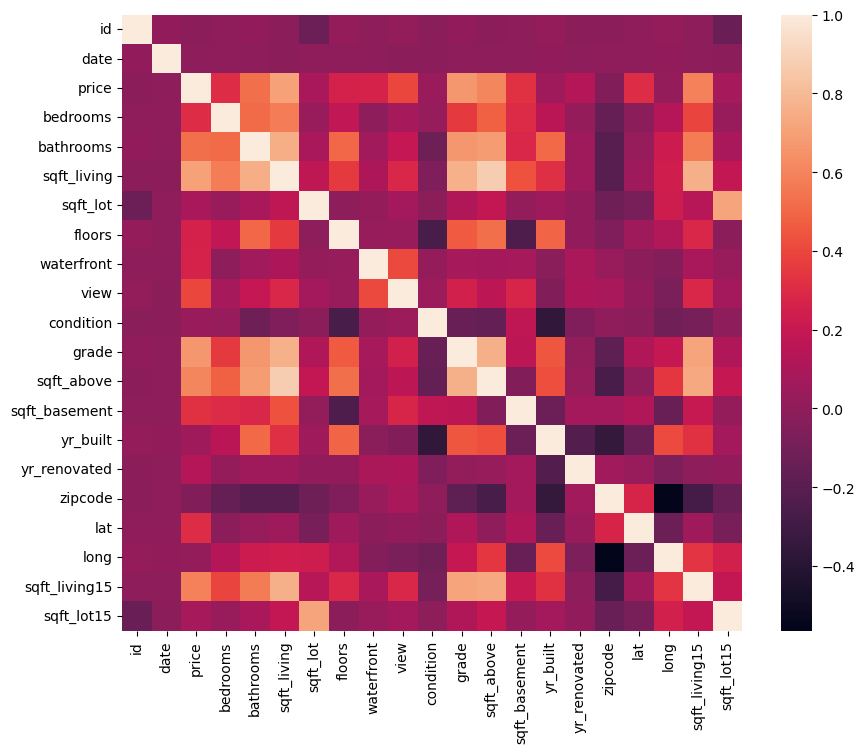

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr())

## `statsmodel`

The package gives us some great insight and summary statistics including `p-value` 

We use it to help determine which variable we should focus on for our **Linear Regression** and get a feel of which values are statistically significant. 

__We want to be able to predict `Y` which is our price variable.__ 

In [ ]:
Y = df[['price']]

In [ ]:
X = df.drop(['price', 'id', 'date'],  axis=1)

In [ ]:
#list our columns 
columns = X.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
import statsmodels.api as sml
from statsmodels import tools

X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(endog = Y,exog =  X_new).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:20:41   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4385      2.270     48.661      0.000     105.990     114.887
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7896      2.253     31.417      0.000      66.373      75.206
sqft_basement    39.6620      2.647     14.985      0.000      34.474      44.850
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     4.96e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.88e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<a id='7'></a>
# <font color="Red">Linear Regression</font>

__Simple Linear Regression__  is when we have one dependent variable (feature) and one independent variable. Here we will pick `sqft_living` as our independent variable `x`.

## <font color="Red">Model Development</font>

__Create our `x` and `y` variables. Then plotting to gain an intuition on how the data looks like.__


In [ ]:
x = X[['sqft_living']]
y = Y

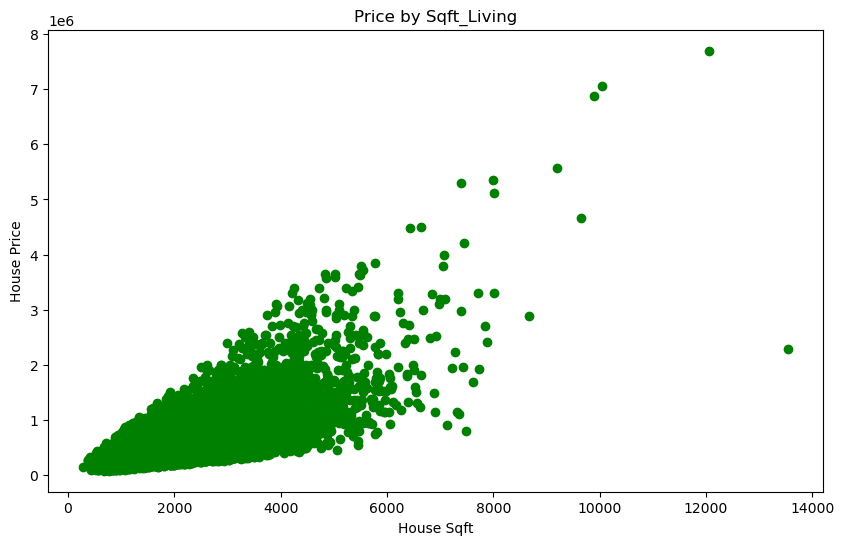

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('House Sqft')
plt.ylabel('House Price')
plt.title('Price by Sqft_Living')
plt.scatter(x,y, marker='o', color='g')

## Simple Linear Regression Implementations:

## 1. Using `seaborn.regplot()` and `scipy.stats`

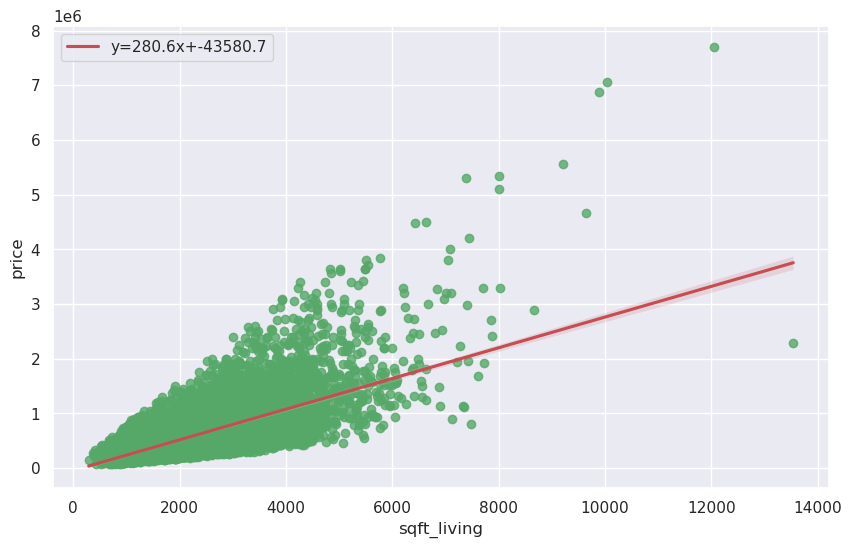

In [ ]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(df['sqft_living'],df['price'])

f = plt.figure(figsize=(10,6))
data = df[['price','sqft_living']]
ax = sns.regplot(x='sqft_living', y='price', data=data, 
                 scatter_kws={"color": "g"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [ ]:
print(slope, intercept)

280.6235678974481 -43580.74309447361


In [ ]:
print(std_err)

1.9363985519989153
